# **Convolutional Neuronal Networks**

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

In [7]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

## **MNIST Dataset**

### **1. Data processing**

#### **1.1 Load dataset - MNIST**

In [50]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()
print('MNIST   :', X_train_mnist.shape, y_train_mnist.shape)

MNIST   : (60000, 28, 28) (60000,)


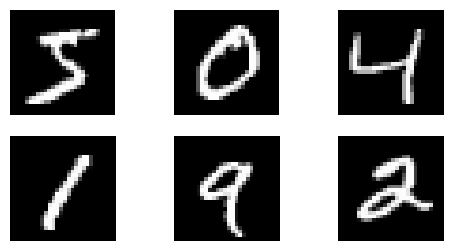

In [51]:
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(X_train_mnist[i].reshape(28,28), cmap='gray')
plt.show()

#### **1.2 Normalize pixel values**

In [52]:
# Normalize to [0, 1]
X_train_mnist = X_train_mnist.astype(np.float32)
X_test_mnist = X_test_mnist.astype(np.float32)

X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)


X_train_mnist /= X_train_mnist.max()
X_test_mnist /= X_test_mnist.max()

y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

### **2. Model implementation**

#### **2.1 My CNN**

In [53]:
def build_custom_cnn(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build and compile the model
custom_cnn = build_custom_cnn()
custom_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 889,834 (3.39 MB)

 Trainable params: 889,834 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history_custom_cnn = custom_cnn.fit(X_train_mnist , y_train_mnist, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9030 - loss: 0.3036 - val_accuracy: 0.9870 - val_loss: 0.0447
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9886 - loss: 0.0375 - val_accuracy: 0.9888 - val_loss: 0.0368
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9920 - val_loss: 0.0255
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9949 - loss: 0.0173 - val_accuracy: 0.9900 - val_loss: 0.0373
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9957 - loss: 0.0140 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9897 - val_loss: 0.0339
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9925 - val_loss: 0.0294
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9971 - loss: 0.0089 - 

In [55]:
custom_eval = custom_cnn.evaluate(X_test_mnist , y_test_mnist, verbose=0)
y_pred_custom = custom_cnn.predict(X_test_mnist)
print('Test accuracy:', custom_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test accuracy: 0.9929999709129333


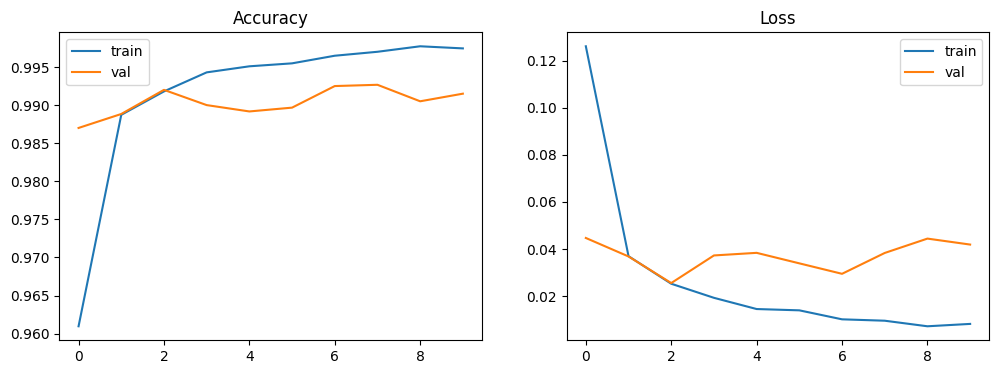

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_custom_cnn.history['accuracy'], label='train')
plt.plot(history_custom_cnn.history['val_accuracy'], label='val')
plt.title('Accuracy'); 

plt.legend()
plt.subplot(1,2,2)
plt.plot(history_custom_cnn.history['loss'], label='train')
plt.plot(history_custom_cnn.history['val_loss'], label='val')
plt.title('Loss'); plt.legend()
plt.show()

#### **2.2 AlexNet CNN**

In [60]:
def build_alexnet(input_shape=(28,28,1), num_classes=10):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2,2), strides=2)(x)
    x = layers.Conv2D(192, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2), strides=2)(x)
    x = layers.Conv2D(384, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2), strides=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

alexnet = build_alexnet()
alexnet.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
               loss='categorical_crossentropy', metrics=['accuracy'])
alexnet.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 7, 7, 384)      │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 7, 7, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,513,994 (108.77 MB)

 Trainable params: 28,513,994 (108.77 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history_alex_cnn = alexnet.fit(
    X_train_mnist, y_train_mnist,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 123s 290ms/step - accuracy: 0.4939 - loss: 1.4621 - val_accuracy: 0.9760 - val_loss: 0.0785
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 117s 278ms/step - accuracy: 0.9667 - loss: 0.1051 - val_accuracy: 0.9848 - val_loss: 0.0523
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 160s 379ms/step - accuracy: 0.9797 - loss: 0.0653 - val_accuracy: 0.9827 - val_loss: 0.0545
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 114s 270ms/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.9888 - val_loss: 0.0424
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 126s 298ms/step - accuracy: 0.9879 - loss: 0.0382 - val_accuracy: 0.9902 - val_loss: 0.0350
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 125s 295ms/step - accuracy: 0.9896 - loss: 0.0310 - val_accuracy: 0.9920 - val_loss: 0.0293
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 135s 278ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9917 - val_loss: 0.0298
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 274ms/step - accuracy: 0.9934 -

In [63]:
alex_eval = alexnet.evaluate(X_test_mnist, y_test_mnist, verbose=1)
y_pred_alex = alexnet.predict(X_test_mnist)
print('Test accuracy:', alex_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9894 - loss: 0.0304
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
Test accuracy: 0.991599977016449


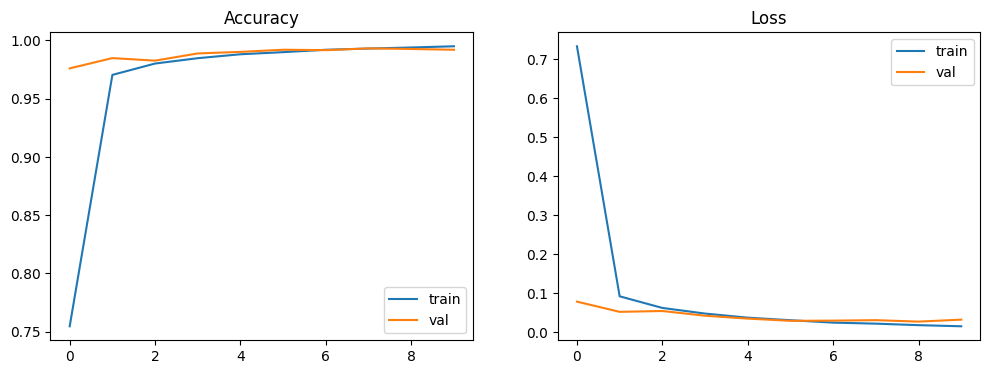

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_alex_cnn.history['accuracy'], label='train')
plt.plot(history_alex_cnn.history['val_accuracy'], label='val')
plt.title('Accuracy'); 

plt.legend()
plt.subplot(1,2,2)
plt.plot(history_alex_cnn.history['loss'], label='train')
plt.plot(history_alex_cnn.history['val_loss'], label='val')
plt.title('Loss'); plt.legend()
plt.show()

#### **2.3 Evaluation**

In [19]:
def plot_confusion_matrix_plotly(y_true, y_pred, classes, title="Confusion Matrix"):
    # Get predicted and true labels
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    # Convert to DataFrame
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    df_cm = df_cm.reset_index().melt(id_vars='index')
    df_cm.columns = ['Actual', 'Predicted', 'Count']

    # Plot with Plotly
    fig = px.imshow(
        cm,
        labels=dict(x="Predicted", y="Actual", color="Count"),
        x=classes,
        y=classes,
        text_auto=True,
        color_continuous_scale="Blues",
        title=title
    )
    fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")
    fig.show()

In [102]:
plot_confusion_matrix_plotly(y_test_mnist, y_pred_custom, classes=[str(i) for i in range(10)], title="Custom CNN")
plot_confusion_matrix_plotly(y_test_mnist, y_pred_alex, classes=[str(i) for i in range(10)], title="AlexNet CNN")

#### **2.4 My dataset**

Custom CNN: The result is probably: 9
AlexNet   : The result is probably: 9


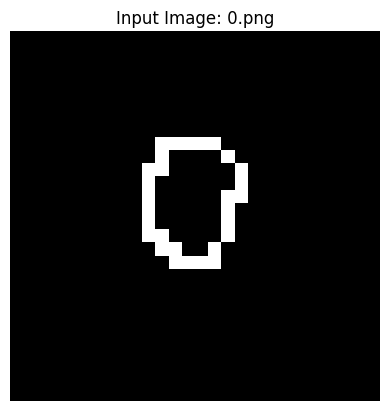

Custom CNN: The result is probably: 1
AlexNet   : The result is probably: 1


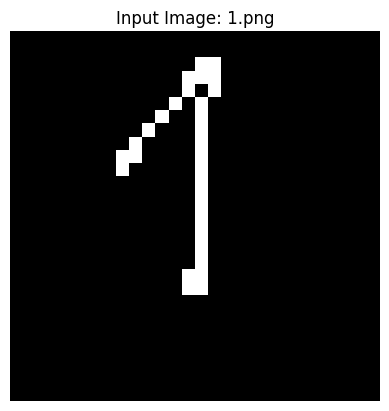

Custom CNN: The result is probably: 2
AlexNet   : The result is probably: 2


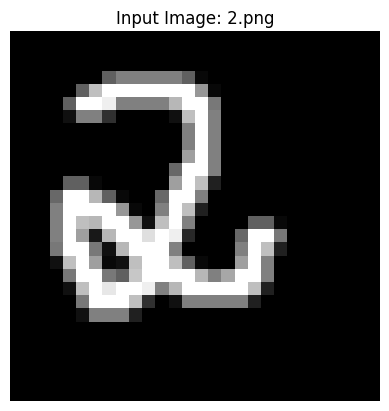

Custom CNN: The result is probably: 3
AlexNet   : The result is probably: 3


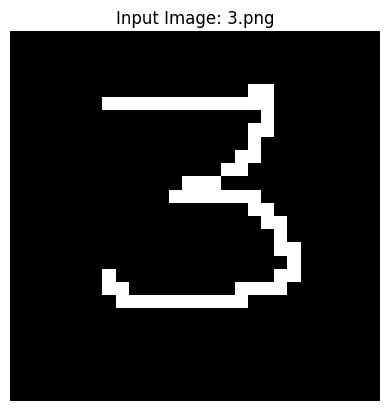

Custom CNN: The result is probably: 4
AlexNet   : The result is probably: 4


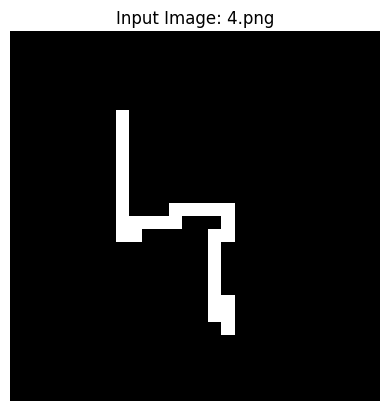

Custom CNN: The result is probably: 5
AlexNet   : The result is probably: 5


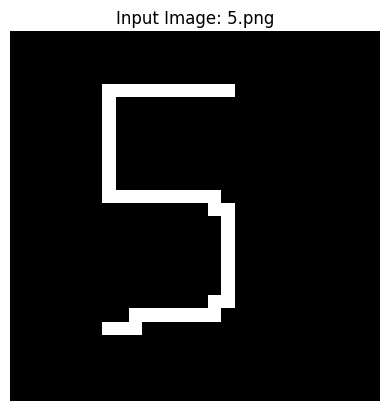

Custom CNN: The result is probably: 4
AlexNet   : The result is probably: 6


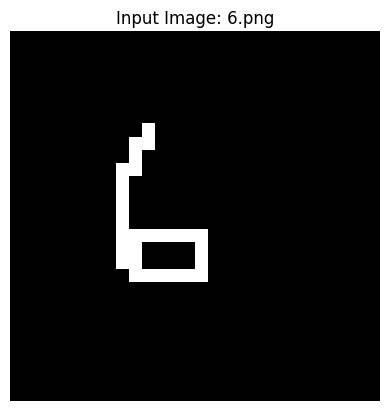

Custom CNN: The result is probably: 7
AlexNet   : The result is probably: 7


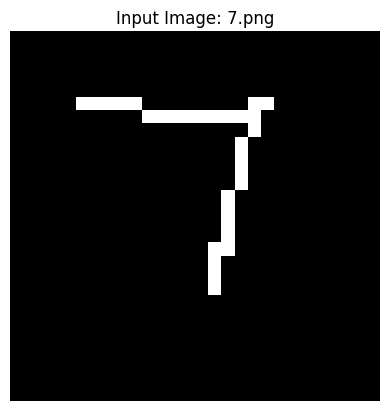

Custom CNN: The result is probably: 6
AlexNet   : The result is probably: 8


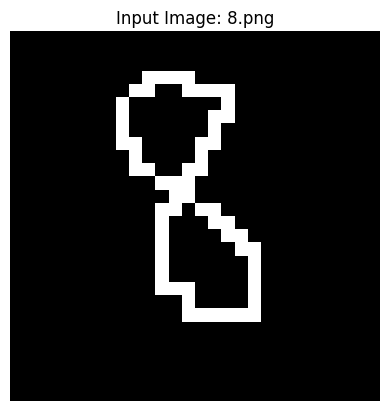

Custom CNN: The result is probably: 9
AlexNet   : The result is probably: 3


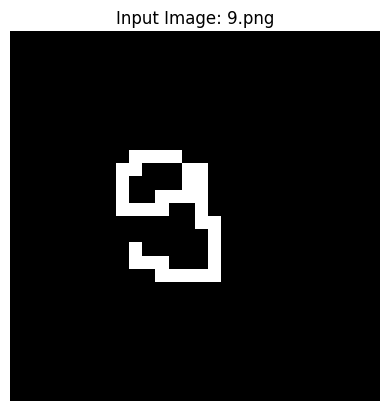

In [65]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

for x in range(0, 10):
    # Load image in grayscale
    img = cv.imread(f'{x}.png', cv.IMREAD_GRAYSCALE)
    
    # Invert and normalize pixel values
    img = np.invert(img).astype('float32') / 255.0

    # Reshape to (1, 28, 28, 1) for CNN input
    img_input = img.reshape(1, 28, 28, 1)

    # Predict with both models
    prediction_custom = custom_cnn.predict(img_input, verbose=0)
    prediction_alex = alexnet.predict(img_input, verbose=0)

    # Show predictions
    print(f'Custom CNN: The result is probably: {np.argmax(prediction_custom)}')
    print(f'AlexNet   : The result is probably: {np.argmax(prediction_alex)}')

    # Visualize the input
    plt.imshow(img, cmap='gray')
    plt.title(f'Input Image: {x}.png')
    plt.axis('off')
    plt.show()

## **CIFAR-10 Dataset**

### **1. Data processing**

#### **1.1 Load dataset - CIFAR-10**

In [37]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

#### **1.2 Normalize pixel values**

In [38]:
x_train_cifar = X_train_cifar.astype('float32') / 255.0
x_test_cifar = X_test_cifar.astype('float32') / 255.0

In [39]:
def sample_cifar10_by_class(x, y, percentage=30):
    sampled_x, sampled_y = [], []
    for class_idx in range(10):
        idxs = np.where(y.flatten() == class_idx)[0]
        num_samples = int(len(idxs) * (percentage / 100.0))
        sampled_idxs = np.random.choice(idxs, num_samples, replace=False)
        sampled_x.append(x[sampled_idxs])
        sampled_y.append(y[sampled_idxs])
    x_sampled = np.concatenate(sampled_x, axis=0)
    y_sampled = np.concatenate(sampled_y, axis=0)
    indices = np.arange(len(x_sampled))
    np.random.shuffle(indices)
    return x_sampled[indices], y_sampled[indices]

In [40]:
x_train_sampled, y_train_sampled = sample_cifar10_by_class(x_train_cifar, y_train_cifar, percentage=30)
y_train_sampled = to_categorical(y_train_sampled, 10)
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar.squeeze(), 10)

### **2. Model implementation**

#### **2.1 My CNN**

In [29]:
def build_custom_cnn_cifar(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.LeakyReLU(negative_slope=0.01),
        layers.Conv2D(32, (3, 3)),
        layers.BatchNormalization(),
        layers.LeakyReLU(negative_slope=0.01),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(negative_slope=0.01),
        layers.Conv2D(64, (3, 3)),
        layers.BatchNormalization(),
        layers.LeakyReLU(negative_slope=0.01),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(negative_slope=0.01),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(negative_slope=0.01),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512),
        layers.LeakyReLU(negative_slope=0.01),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [30]:
# Build and compile the model
custom_cnn_cifar = build_custom_cnn_cifar()
custom_cnn_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_cnn_cifar.summary()

c:\Users\Chis Bogdan-Mihai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 6, 6, 128)      │             

 Total params: 884,266 (3.37 MB)

 Trainable params: 883,370 (3.37 MB)

 Non-trainable params: 896 (3.50 KB)

In [42]:
history_custom_cnn_cifar = custom_cnn_cifar.fit(x_train_cifar , y_train_cifar, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6855 - loss: 0.9028 - val_accuracy: 0.6850 - val_loss: 0.8910
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7148 - loss: 0.8122 - val_accuracy: 0.6860 - val_loss: 0.8828
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7401 - loss: 0.7399 - val_accuracy: 0.7352 - val_loss: 0.7892
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.7617 - loss: 0.6908 - val_accuracy: 0.6120 - val_loss: 1.2527
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.7751 - loss: 0.6438 - val_accuracy: 0.7614 - val_loss: 0.7055
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.7957 - loss: 0.6019 - val_accuracy: 0.7758 - val_loss: 0.6752
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8025 - loss: 0.5708 - val_accuracy: 0.8032 - val_loss: 0.5840
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8195 - loss: 0.5286 - 

In [43]:
custom_eval_cifar = custom_cnn_cifar.evaluate(x_test_cifar , y_test_cifar, verbose=0)
y_pred_custom_cifar = custom_cnn_cifar.predict(x_test_cifar)
print('Test accuracy:', custom_eval_cifar[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test accuracy: 0.7975999712944031


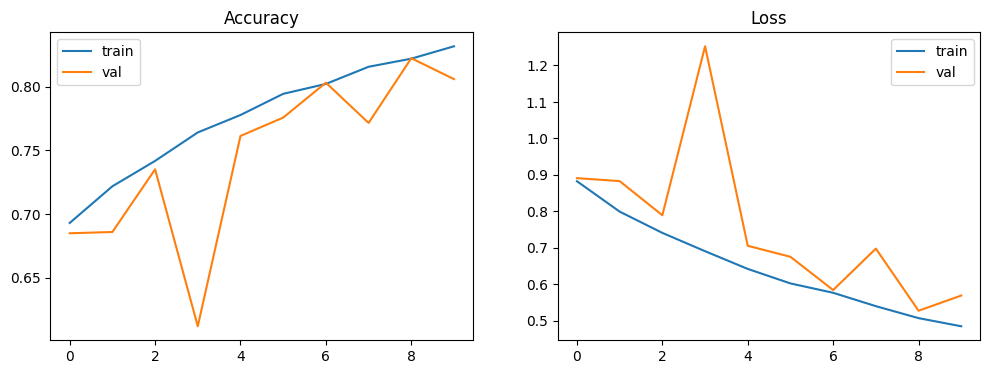

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_custom_cnn_cifar.history['accuracy'], label='train')
plt.plot(history_custom_cnn_cifar.history['val_accuracy'], label='val')
plt.title('Accuracy'); 

plt.legend()
plt.subplot(1,2,2)
plt.plot(history_custom_cnn_cifar.history['loss'], label='train')
plt.plot(history_custom_cnn_cifar.history['val_loss'], label='val')
plt.title('Loss'); plt.legend()
plt.show()

#### **2.2 AlexNet CNN**

In [12]:
def build_alexnet_cifar10(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Conv2D(256, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Conv2D(256, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [13]:
alexnet_cifar = build_alexnet_cifar10()
alexnet_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
alexnet_cifar.summary()

c:\Users\Chis Bogdan-Mihai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,576,138 (9.83 MB)

 Trainable params: 2,574,474 (9.82 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [16]:
history_alex_cifar = alexnet_cifar.fit(
    x_train_sampled, y_train_sampled,
    batch_size=64,
    epochs=20,
    validation_split=0.1,
)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.7273 - loss: 0.7970 - val_accuracy: 0.5827 - val_loss: 1.2092
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.7512 - loss: 0.7034 - val_accuracy: 0.6260 - val_loss: 1.1230
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.7654 - loss: 0.6612 - val_accuracy: 0.4160 - val_loss: 2.0323
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.7920 - loss: 0.5943 - val_accuracy: 0.6347 - val_loss: 1.1553
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.8061 - loss: 0.5448 - val_accuracy: 0.6713 - val_loss: 0.9846
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.8268 - loss: 0.5071 - val_accuracy: 0.6400 - val_loss: 1.1149
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.8430 - loss: 0.4607 - val_accuracy: 0.6367 - val_loss: 1.1127
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.8433 - loss: 0.4

In [17]:
alex_eval_cifar = alexnet_cifar.evaluate(x_test_cifar, y_test_cifar, verbose=1)
y_pred_alex_cifar = alexnet_cifar.predict(x_test_cifar)
print("Test accuracy:", alex_eval_cifar[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7289 - loss: 0.9701
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Test accuracy: 0.7242000102996826


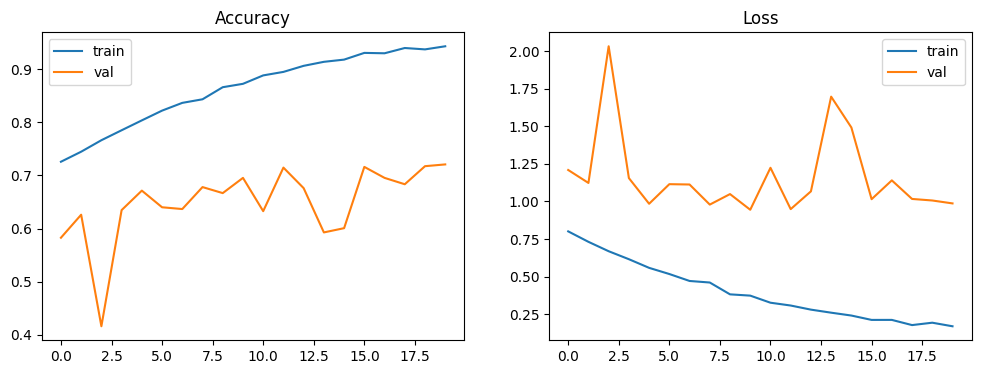

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_alex_cifar.history['accuracy'], label='train')
plt.plot(history_alex_cifar.history['val_accuracy'], label='val')
plt.title('Accuracy'); 

plt.legend()
plt.subplot(1,2,2)
plt.plot(history_alex_cifar.history['loss'], label='train')
plt.plot(history_alex_cifar.history['val_loss'], label='val')
plt.title('Loss'); plt.legend()
plt.show()

#### **2.3 Evaluation**

In [45]:
plot_confusion_matrix_plotly(y_test_cifar, y_pred_custom_cifar, classes=[str(i) for i in range(10)], title="Custom CNN")
plot_confusion_matrix_plotly(y_test_cifar, y_pred_alex_cifar, classes=[str(i) for i in range(10)], title="AlexNet CNN")

In [68]:
import numpy as np

# Simulate the scenario: find test samples where true label is 3 but model predicted 5
def find_misclassified_examples(x_data, y_true, y_pred, true_class, predicted_class, max_examples=5):
    true_labels = np.argmax(y_true, axis=1)
    predicted_labels = np.argmax(y_pred, axis=1)
    indices = np.where((true_labels == true_class) & (predicted_labels == predicted_class))[0]
    return indices[:max_examples]

# This function will be defined for later use when user confirms y_pred/y_test are loaded
def preview_misclassified_images(x_data, indices, model_name="Model"):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(x_data[idx].squeeze(), cmap='gray')
        plt.title(f"{model_name}\nTrue: 3 → Pred: 5")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

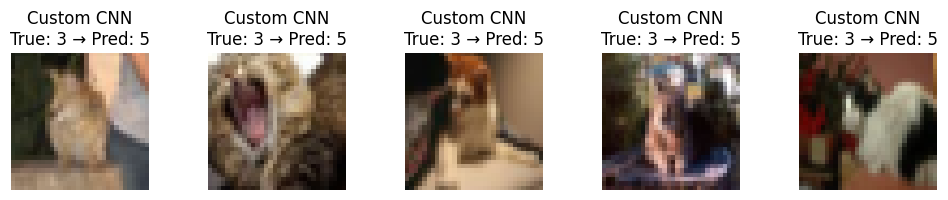

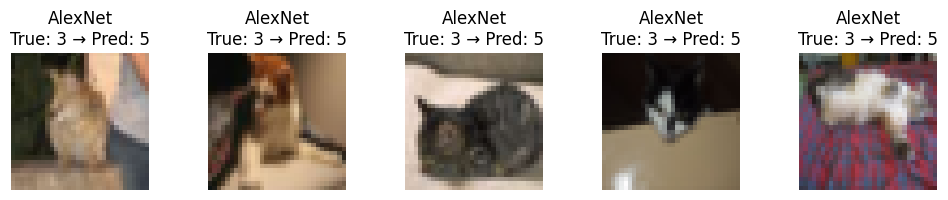

In [69]:
# Assuming all 4 variables are loaded and valid:
indices_custom = find_misclassified_examples(x_test_cifar, y_test_cifar, y_pred_custom_cifar, 3, 5)
preview_misclassified_images(x_test_cifar, indices_custom, model_name="Custom CNN")

indices_alex = find_misclassified_examples(x_test_cifar, y_test_cifar, y_pred_alex_cifar, 3, 5)
preview_misclassified_images(x_test_cifar, indices_alex, model_name="AlexNet")